#Problem 01

(-0.5, 719.5, 809.5, -0.5)

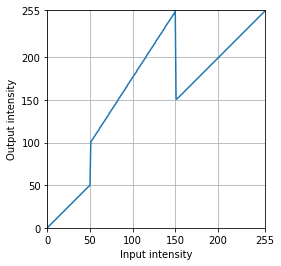

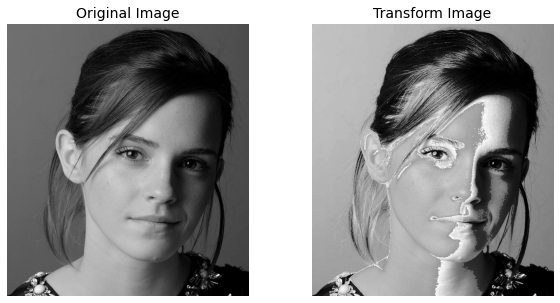

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#making numpy array to store the critical points
c = np.array([(50,100),(150,254)])

#5 lines
t1=np.linspace(0,c[0,0],c[0,0]+1-0).astype("uint8")
t2=np.linspace(c[0,0],c[0,1],0).astype("uint8")
t3=np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype("uint8")
t4=np.linspace(c[1,1]-1,c[1,0],0).astype("uint8")
t5=np.linspace(c[1,0]+1,c[1,1],c[1,1]-c[1,0]+1).astype("uint8")


#combining them into one graph
transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform =np.concatenate((transform,t3),axis=0).astype("uint8")
transform =np.concatenate((transform,t4),axis=0).astype("uint8")
transform =np.concatenate((transform,t5),axis=0).astype("uint8")

#plotting the graph
fig,ax  = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
label = [0, 50, 100,150, 200,255]
ax.grid("on")
plt.xticks(label)
plt.yticks(label)

ax.set_aspect("equal") # To ensure the aspect ratio of x and y axis are equal

#output the original Image
original_image = cv.imread("emma.jpg",cv.IMREAD_GRAYSCALE)
cv.imshow("Image",original_image)
cv.waitKey(0)
cv.destroyAllWindows()

#output the intensity added Image
image_t = cv.LUT(original_image,transform)
cv.imshow("Image",image_t)
cv.waitKey(0)
cv.destroyAllWindows()


fig,ax = plt.subplots(1,2,figsize = (10,5))

ax[0].imshow(cv.cvtColor(original_image,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image', fontsize = 14)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(image_t,cv.COLOR_BGR2RGB))
ax[1].set_title('Transform Image', fontsize = 14)
ax[1].axis('off')

#Problem 2

(-0.5, 180.5, 216.5, -0.5)

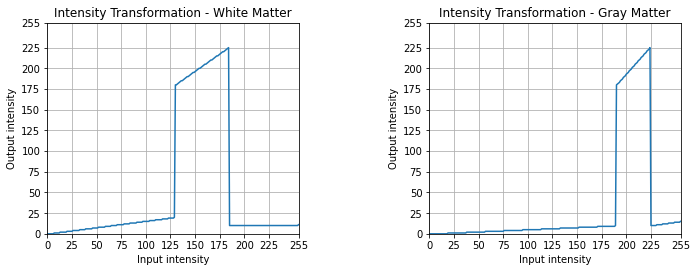

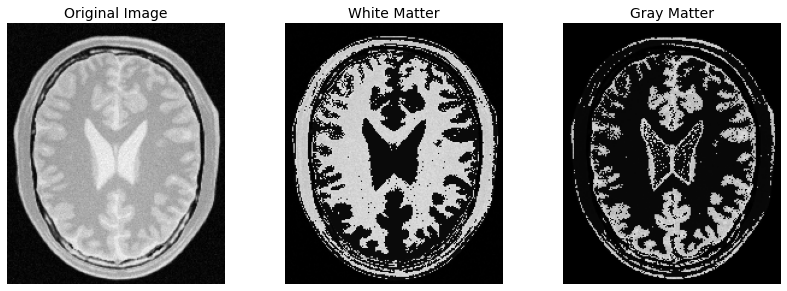

In [17]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


#For white matter
white1 = np.linspace(0, 20, 130).astype("uint8")
white2 = np.linspace(180, 225, 55).astype("uint8")
white3 = np.linspace(10, 11, 71).astype("uint8")

#For gray matter
gray1 = np.linspace(0, 10, 190).astype("uint8")
gray2 = np.linspace(180, 225, 35).astype("uint8")
gray3 = np.linspace(10, 15, 31).astype("uint8")

#concatenating the intensity graphs
white = np.concatenate((white1,white2,white3),axis=0).astype(np.uint8)
gray = np.concatenate((gray1,gray2,gray3),axis=0).astype(np.uint8)

assert len(white) == 256
assert len(gray) == 256

#plotting the graphs
fig, ax = plt.subplots(1,2,figsize = (12,6))
fig.tight_layout(pad =10.0)

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225,255]

#white matter
ax[0].plot(white)
ax[0].set_title('Intensity Transformation - White Matter')
ax[0].grid("on")
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xticks(label)
ax[0].set_yticks(label)
ax[0].set_xlabel('Input intensity')
ax[0].set_ylabel('Output intensity')

#gray matter
ax[1].plot(gray)
ax[1].set_title("Intensity Transformation - Gray Matter")
ax[1].grid("on")
ax[1].set_xlim([0,255])
ax[1].set_ylim([0,255])
ax[1].set_xticks(label)
ax[1].set_yticks(label)
ax[1].set_xlabel('Input intensity')
ax[1].set_ylabel('Output intensity')

#taking the Image
im = cv.imread("BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)

#convert the image to correct look up table
white_transform = cv.LUT(im,white)
gray_transform = cv.LUT(im,gray)

fig, ax = plt.subplots(1,3,figsize = (12,12))
fig.tight_layout(pad =4.0)

ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image', fontsize = 14)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(white_transform,cv.COLOR_BGR2RGB))
ax[1].set_title('White Matter', fontsize = 14)
ax[1].axis('off')

ax[2].imshow(cv.cvtColor(gray_transform,cv.COLOR_BGR2RGB))
ax[2].set_title('Gray Matter', fontsize = 14)
ax[2].axis('off')

#Problem 3-(a)

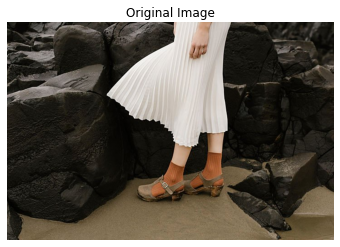

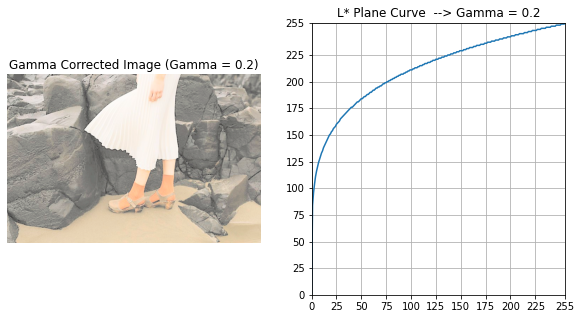

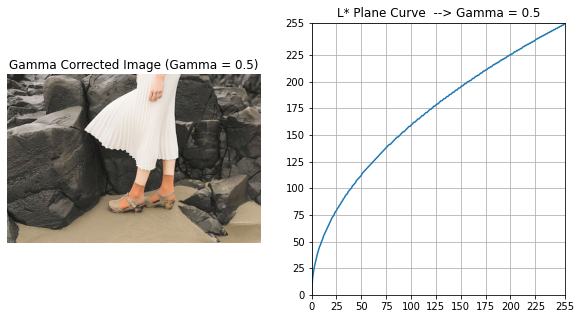

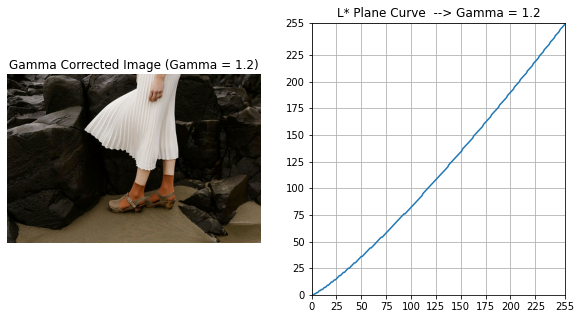

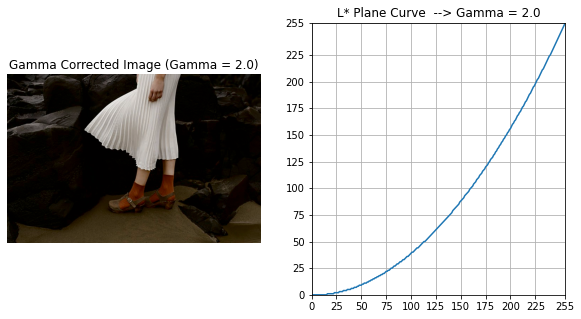

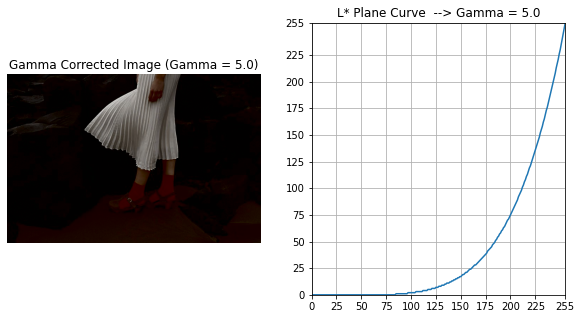

In [16]:
im = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)

#convert the image color to L*a*b color space
lab = cv.cvtColor(im, cv.COLOR_BGR2LAB) 

#ploting the original Image
fig, ax = plt.subplots()
ax.imshow(cv.cvtColor(im ,cv.COLOR_BGR2RGB))
ax.set_title("Original Image")
ax.axis('off')

L, a, b = cv.split(lab) #split the L,a,b values

#Gamma values
gamma = [0.2, 0.5, 1.2, 2.0, 5.0]

histograms = []

for g in gamma:
    #making the look up tables for gamma values
    lookUpTable = np.array([(p/255)**(g)*255 for p in range(0, 256)]).astype(np.uint8)

    #put gamma corrections to L plane
    Lgamma = cv.LUT(L, lookUpTable)

    lab_gamma = cv.merge([Lgamma, a, b])
    histograms.append(cv.calcHist([lab_gamma],[0],None,[256],[0,256]))

    #convert it to RGB image
    img = cv.cvtColor(lab_gamma, cv.COLOR_LAB2BGR)
            
    label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]

    fig, ax = plt.subplots(1, 2, figsize = (10, 5))
    ax[0].imshow(cv.cvtColor(img ,cv.COLOR_BGR2RGB))
    ax[0].axis('off')
    ax[0].set_title("Gamma Corrected Image (Gamma = " + str(g)+")")


    ax[1].plot(lookUpTable)
    ax[1].set_title("L* Plane Curve  --> Gamma = " + str(g))
    ax[1].grid("on")
    ax[1].set_xlim([0, 255])
    ax[1].set_ylim([0, 255])
    ax[1].set_xticks(label)
    ax[1].set_yticks(label)
    plt.show()

#Problem 3-(b)

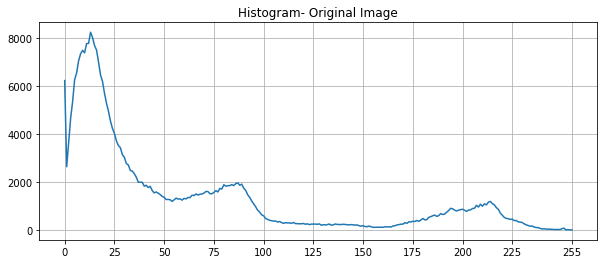

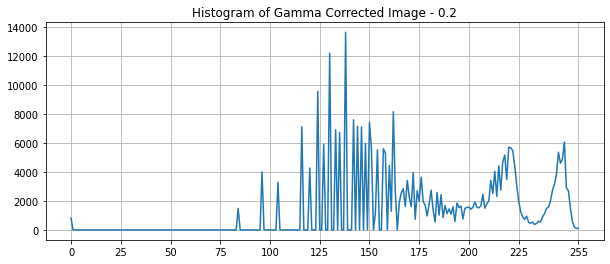

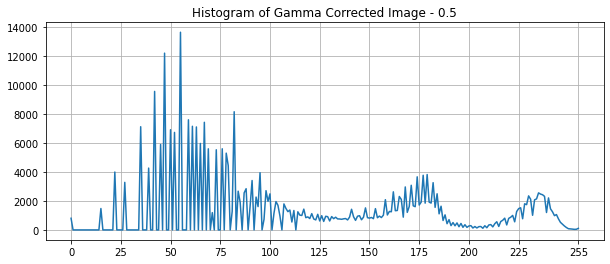

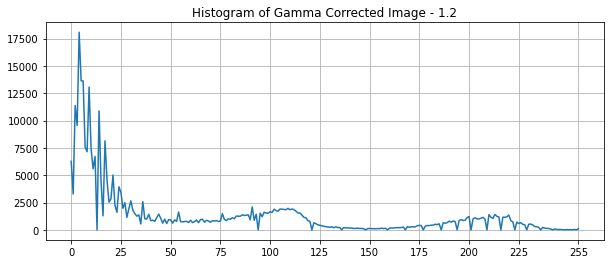

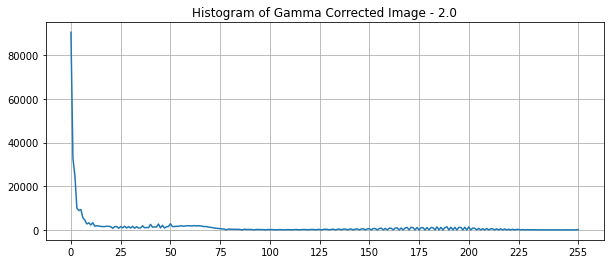

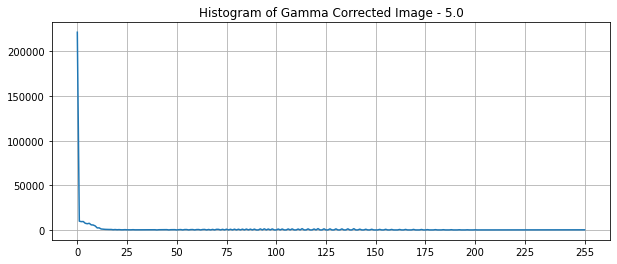

In [23]:
histogram_of_original_image = cv.calcHist([im],[0],None,[256],[0,256])

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]
#Histogram of Original Image
fig,ax = plt.subplots(1,1,figsize = (10,4))
ax.plot(histogram_of_original_image)
ax.set_title("Histogram- Original Image")
ax.set_xticks(label)
ax.grid("on")


#Histogram of gamma corrected Images
for k in range(len(histograms)):
    hist_f = cv.calcHist([im], [0], None, [256], [0,256])
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    ax.plot(histograms[k])
    ax.set_title("Histogram of Gamma Corrected Image - " + str(gamma[k]))
    ax.set_xticks(label)
    ax.grid('on')
plt.show()

#Problem 4

#Problem 5

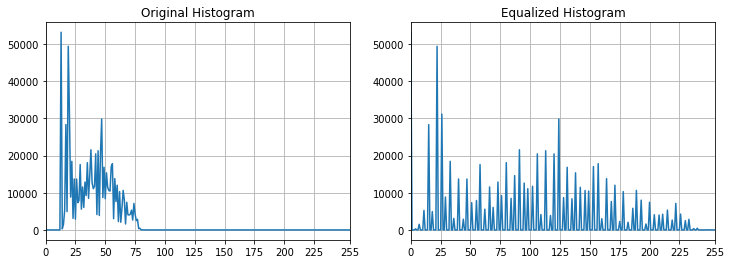

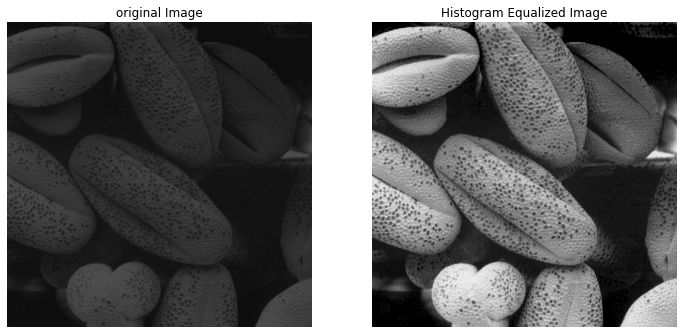

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


#making function to get histogram_equalization
def custom_histogram_equalization(image):
    imhis = image.copy()
    hist, _ = np.histogram(imhis.flatten(), bins=256, range=[0, 256])
    
    low = 0
    high = 255
    
    for i in range(0, 256):
        if hist[i] != 0:
            low = i
            break
    
    for i in range(255, -1, -1):
        if hist[i] != 0:
            high = i
            break
    
    # Perform histogram equalization using array operations
    imhis = np.round((imhis - low) * ((255 - 0) / (high - low)))
    imhis = np.clip(imhis, 0, 255)  # Clip values to ensure they are within [0, 255]
    
    return imhis.astype(np.uint8)  # Convert back to uint8 data type

im = cv.imread("shells.tif", cv.IMREAD_COLOR)

# Apply custom histogram equalization
equalized_im = custom_histogram_equalization(im)

# Plot the original and equalized histograms
label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original histogram
original_hist, _ = np.histogram(im.flatten(), bins=256, range=[0, 256])
axes[0].set_title("Original Histogram")
axes[0].set_xticks(label)
axes[0].plot(original_hist)
axes[0].grid(True)
axes[0].set_xlim([0, 255])

# Equalized histogram
equalized_hist, _ = np.histogram(equalized_im.flatten(), bins=256, range=[0, 256])
axes[1].set_title("Equalized Histogram")
axes[1].set_xticks(label)
axes[1].plot(equalized_hist)
axes[1].grid(True)
axes[1].set_xlim([0, 255])

#ploting the Images
fig,ax = plt.subplots(1,2,figsize=(12,6))
#orignal Image
ax[0].set_title("original Image",)
ax[0].imshow(cv.cvtColor(im ,cv.COLOR_BGR2RGB))
ax[0].axis("off")

#Histogram Equalized Image
ax[1].set_title("Histogram Equalized Image",)
ax[1].imshow(cv.cvtColor(equalized_im ,cv.COLOR_BGR2RGB))
ax[1].axis("off")


plt.show()

#Problem 6

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


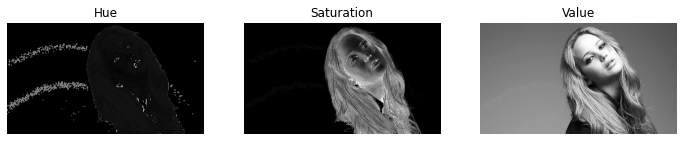

In [22]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread("jeniffer.jpg",cv.IMREAD_COLOR)
hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
h,s,v =cv.split(hsv)

fig,ax = plt.subplots(1,3,figsize=(12,6))

ax[0].set_title("Hue")
ax[0].imshow(cv.cvtColor(h ,cv.COLOR_GRAY2RGB))
ax[0].axis("off")


ax[1].set_title("Saturation")
ax[1].imshow(cv.cvtColor(s ,cv.COLOR_GRAY2RGB))
ax[1].axis("off")

ax[2].set_title("Value")
ax[2].imshow(cv.cvtColor(v ,cv.COLOR_GRAY2RGB))
ax[2].axis("off")



# Apply thresholding to the Value component
threshold_value = 155  #threshold
_, foreground_mask = cv.threshold(v, threshold_value, 255, cv.THRESH_BINARY)

new_size = (1200, 800)  # Specify the desired width and height
resized_foreground_mask = cv.resize(foreground_mask, new_size, interpolation=cv.INTER_AREA)

# Display the resized foreground mask
cv.imshow('Resized Foreground Mask', resized_foreground_mask)

# Wait for a key press and then close the window
cv.waitKey(0)
cv.destroyAllWindows()

# Use bitwise_and to obtain the foreground pixels
foreground = cv.bitwise_and(im, im, mask=resized_foreground_mask)

# Compute the histogram of the foreground pixels
histogram = cv.calcHist([foreground], [0], resized_foreground_mask, [256], [0, 256])

fig,ax =plt.subplots()
ax.plot(histogram)
ax.xlabel('Pixel Value')
ax.ylabel('Frequency')
ax.title('Histogram of Foreground')
plt.show()


#Problem 7

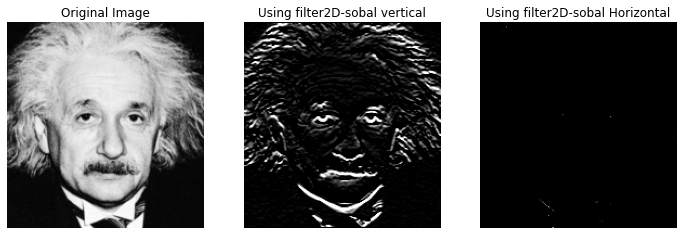

In [5]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread("einstein.png",cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel_for_sobal_vertical = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype="float")
kernel_for_sobal_horizontal = np.array([(-1,0,1),(-2,0,-2),(-1,0,1)],dtype="float")
filt_vertical = cv.filter2D(im,-1,kernel_for_sobal_vertical) # image, depth -(depth is like the channel) , the kernel array
filt_horizontal = cv.filter2D(im,-1,kernel_for_sobal_horizontal) # image, depth -(depth is like the channel) , the kernel array
fig,ax = plt.subplots(1,3,figsize=(12,6))

ax[0].imshow(im, cmap="gray")
ax[0].axis("off")
ax[0].set_title("Original Image",)

ax[1].imshow(filt_vertical,cmap="gray")
ax[1].axis("off")
ax[1].set_title("Using filter2D-sobal vertical",)


ax[2].imshow(filt_horizontal,cmap = "gray")
ax[2].axis("off")
ax[2].set_title("Using filter2D-sobal Horizontal",)

plt.show()

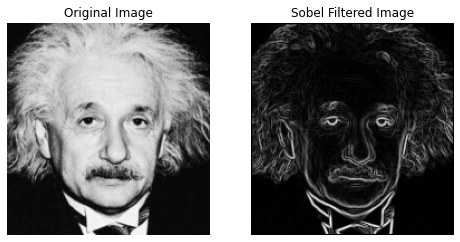

In [6]:
im_gg = np.zeros((im.shape[0],im.shape[1]),np.uint8)

for i in range(1,im.shape[0]-1):
    for j in range(1,im.shape[1]-1):
        f_xx = im[i-1, j-1]*(-1) + im[i-1, j]*(-2) + im[i-1, j+1]*(-1) + im[i+1, j-1]*1 + im[i+1, j]*2 + im[i+1, j+1]*1
        f_hh = im[i-1, j-1]*(-1) + im[i, j-1]*(-2) + im[i-1, j+1]*1 + im[i+1, j-1]*(-1) + im[i, j+1]*2 + im[i+1, j+1]*1
        grad = np.sqrt(f_xx**2 + f_hh**2)
        im_gg[i, j] = (grad / 1020) * 255 #for normalization
        
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(im_gg, cmap = 'gray')
ax[1].set_title("Sobel Filtered Image")
ax[1].axis('off')

plt.show()



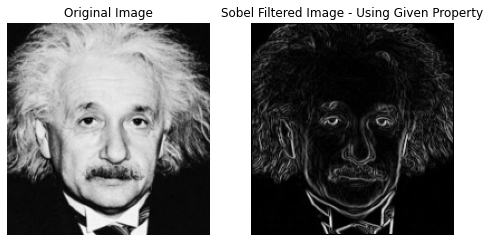

In [7]:


im_gd = np.zeros((im.shape[0],im.shape[1]),np.uint8)

mat = np.multiply((np.array([[1],[2],[1]], dtype=np.int32)),(np.array([1,0,-1], dtype=np.int32)))

sobel_hh = np.array([[0,0,0],[0,0,0],[0,0,0]])
for i in range(len(mat)):
    sobel_hh[i] = mat[i][::-1]

sobel_vv = sobel_hh.T

for i in range(1,im.shape[0]-1):
    for j in range(1,im.shape[1]-1):
        image = np.array([[im[i-1,j-1],im[i,j],im[i+1,j+1]], [im[i,j-1],im[i,j],im[i,j+1]], [im[i+1,j-1],im[i+1,j],im[i+1,j+1]]], dtype=np.float32)
        ##print(image)
        val_xx = 0
        val_yy = 0
        for k in range(3):
            for m in range(3):
                val_xx += image[k][m]*sobel_hh[k][m]
                val_yy += image[k][m]*sobel_vv[k][m]
        ##print(val_xx, val_yy)
        grad = np.sqrt(val_xx**2 + val_yy**2)
        im_gd[i, j] = (grad / 1020) * 255
                
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(im_gd, cmap = 'gray')
ax[1].set_title("Sobel Filtered Image - Using Given Property")
ax[1].axis('off')

plt.show()    



#Problem 8

##Problem 9

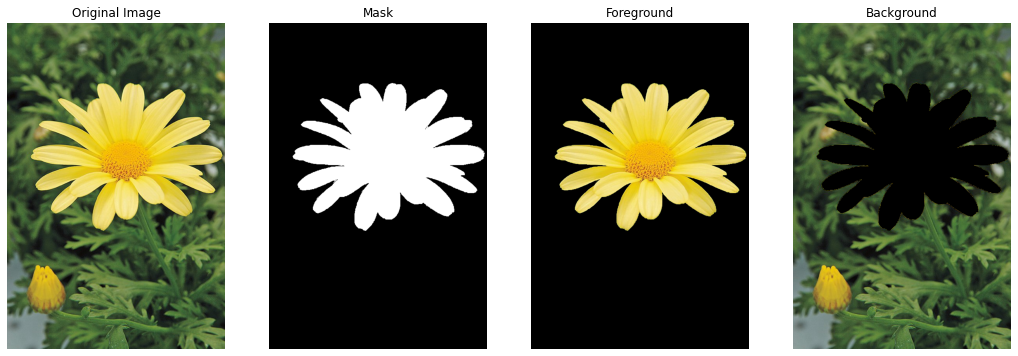

In [12]:
im = cv.imread("flower.jpg",cv.IMREAD_COLOR) #getting the image

fig, ax = plt.subplots(1, 4, figsize=(18, 6))

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")


mask = np.zeros(im.shape[:2], np.uint8) #taking mask as original size of image
#to select rectangle area
rect = (0, 90, 800, 500)
fgdModel = np.zeros((1, 65), np.float64)
bgdModel = np.zeros((1, 65), np.float64)

cv.grabCut(im, mask, rect, bgdModel, fgdModel, 6, cv.GC_INIT_WITH_RECT)

# mask-0 --> Definite background
# mask-1 --> Definite forground
# mask-2 --> Probable background
# mask-3 --> Probable forground

#forground mask
mask1 = np.where((mask==0) | (mask==2), 0, 1).astype("uint8")
foreground_image = im*mask1[:, :, np.newaxis]

#background mask
mask2 = np.where((mask==1) | (mask==3), 0, 1).astype("uint8")
background_image = im*mask2[:, :, np.newaxis]



#after the segmantation
ax[1].imshow(mask1, cmap = "gray")
ax[1].set_title("Mask")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(foreground_image, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground")
ax[2].axis("off")

ax[3].imshow(cv.cvtColor(background_image, cv.COLOR_BGR2RGB))
ax[3].set_title("Background")
ax[3].axis("off")

plt.show()



In [ ]:
# Apply Gaussian blur to the background image
im_blurred = cv.GaussianBlur(background_image, (15, 15), 0)

# Combine the blurred background and foreground images
im_enhanced = cv.addWeighted(im_blurred, 0.5, foreground_image, 0.5, 0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

ax[1].imshow(cv.cvtColor(im_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title('Enhanced Image')

for a in ax:
    a.axis('off')

plt.show()


